# Exploratory Data Analysis (EDA)

This notebook explores and summarizes the datasets:
- **Machine_Settings_Log_01.csv**
- **Production_Log_01.csv**

---

## 1. Imports and Settings

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

## 2. Load the Data

In [3]:
# Update path if running elsewhere
machine = pd.read_csv('Machine_Settings_Log_01.csv')
production = pd.read_csv('Production_Log_01.csv')

print(f'Machine Settings shape: {machine.shape}')
print(f'Production Log shape: {production.shape}')

Machine Settings shape: (10000, 3)
Production Log shape: (10000, 20)


In [4]:
merged_df = pd.merge(machine, production, on='configuration_log_ID', how='inner')
merged_df.shape

(10000, 22)

In [5]:
merged_df_t = pd.merge(machine, production, on='configuration_log_ID', how='outer')
merged_df_t.shape

(10000, 22)

In [6]:
merged_df.info()
merged_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   configuration_log_ID  10000 non-null  int64  
 1   gear                  10000 non-null  int64  
 2   rotation_speed        10000 non-null  float64
 3   id                    10000 non-null  int64  
 4   width                 10000 non-null  float64
 5   height                10000 non-null  float64
 6   ionizationclass       10000 non-null  object 
 7   FluxCompensation      10000 non-null  object 
 8   pressure              10000 non-null  float64
 9   karma                 10000 non-null  float64
 10  modulation            10000 non-null  float64
 11  weight_in_kg          10000 non-null  float64
 12  weight_in_g           10000 non-null  float64
 13  error                 10000 non-null  object 
 14  error_type            3365 non-null   object 
 15  Quality             

,configuration_log_ID,gear,rotation_speed,id,width,height,ionizationclass,FluxCompensation,pressure,karma,...,weight_in_g,error,error_type,Quality,reflectionScore,distortion,nicesness,smartness,multideminsionality,roughness
0,1,2,122.121415,1,137.419169,44.326218,C,IV,103.937207,976.538993,...,8.370683e+08,no,NaN,95.489138,703.193051,49.666361,139.496837,2964.217002,no,123.202181
1,2,1,111.977476,2,98.706037,41.619531,A,II,101.177877,1031.806826,...,4.355043e+08,no,NaN,98.262642,663.936149,52.826310,100.380138,2733.298369,yes,111.040858
2,3,1,137.268544,3,117.262568,41.421088,A,III,99.381956,840.246668,...,5.995707e+08,no,NaN,98.472489,674.814037,51.967423,115.995772,2716.279965,no,138.439571
3,4,2,125.719071,4,122.657252,41.202308,A,I,101.833664,964.391122,...,6.498897e+08,no,NaN,97.107023,661.281569,47.626823,121.383895,2694.883523,no,125.939831
4,5,1,134.710713,5,118.085366,43.418485,C,I,95.246304,859.331870,...,6.054444e+08,no,NaN,92.994235,684.026152,47.420237,118.633440,2885.260257,no,135.123613


In [10]:
print(merged_df['error'].value_counts())

error
no     6635
yes    3365
Name: count, dtype: int64


In [12]:
# Show unique values to see what error types exist
print(merged_df['error_type'].unique())


[nan 'severe' 'minor' 'critical']


In [15]:
# Fill missing/empty error_type with a label (e.g., 'No Error')
merged_df['error_type'] = merged_df['error_type'].replace('', pd.NA)
merged_df['error_type'] = merged_df['error_type'].fillna('No Error')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   configuration_log_ID  10000 non-null  int64  
 1   gear                  10000 non-null  int64  
 2   rotation_speed        10000 non-null  float64
 3   id                    10000 non-null  int64  
 4   width                 10000 non-null  float64
 5   height                10000 non-null  float64
 6   ionizationclass       10000 non-null  object 
 7   FluxCompensation      10000 non-null  object 
 8   pressure              10000 non-null  float64
 9   karma                 10000 non-null  float64
 10  modulation            10000 non-null  float64
 11  weight_in_kg          10000 non-null  float64
 12  weight_in_g           10000 non-null  float64
 13  error                 10000 non-null  object 
 14  error_type            10000 non-null  object 
 15  Quality             

/var/folders/lj/36924lnj39380jwmbklmk4hh0000gn/T/ipykernel_14874/2333294152.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=errors_df, x='error_type', palette='viridis')


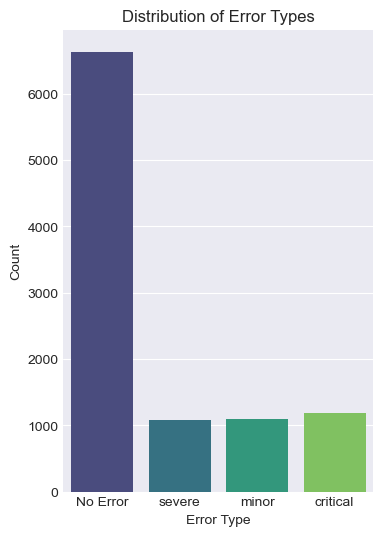

In [14]:
errors_df = merged_df[merged_df['error_type'].isin(['critical', 'severe', 'minor','No Error'])]
errors_df.shape
errors_df.info()
# Plotting the distribution of error types
plt.figure(figsize=(4, 6))
sns.countplot(data=errors_df, x='error_type', palette='viridis')
plt.title('Distribution of Error Types')
plt.xlabel('Error Type')
plt.ylabel('Count')
plt.show()

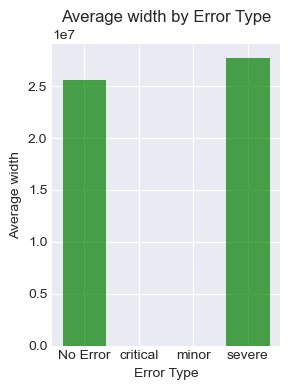

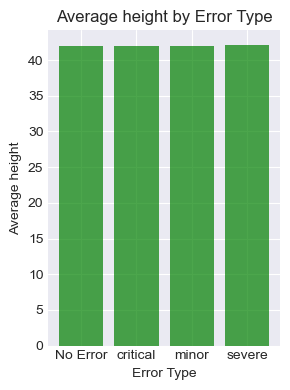

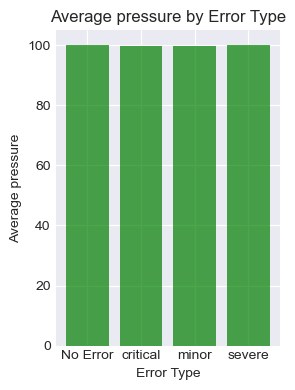

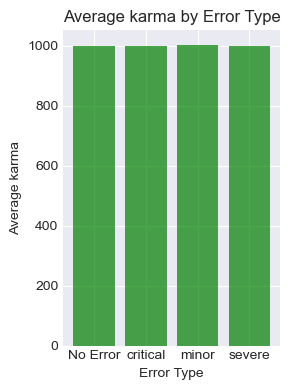

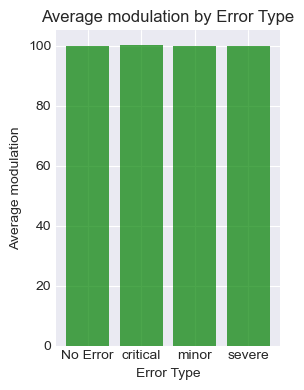

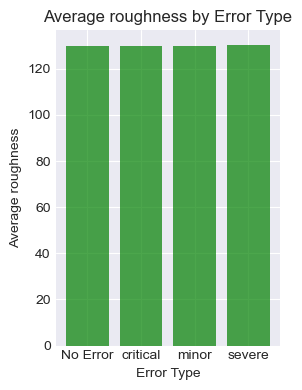

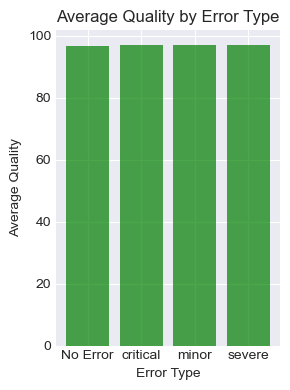

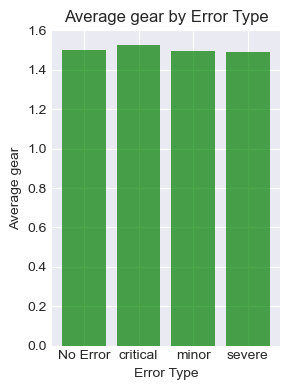

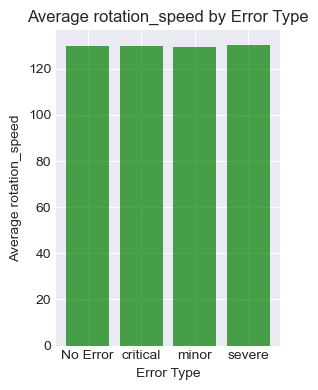

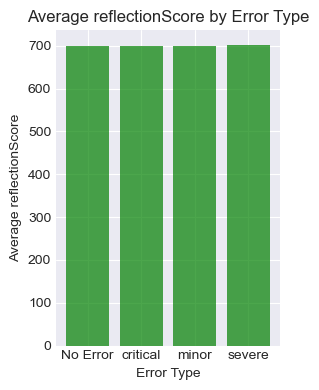

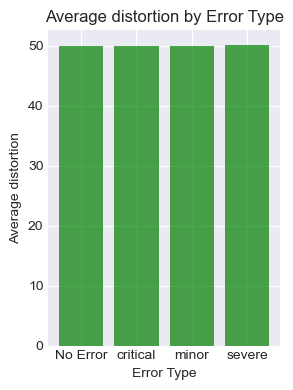

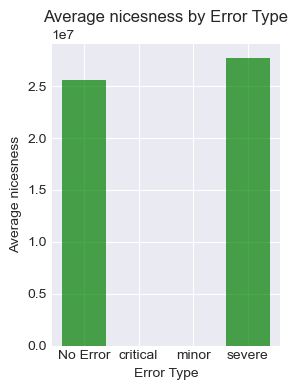

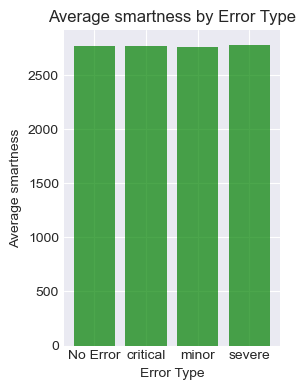

In [17]:
numeric_cols = ['width', 'height', 'pressure', 'karma', 'modulation', 'roughness', 'Quality', 'gear', 'rotation_speed','reflectionScore', 'distortion','nicesness','smartness']

# Convert columns to numeric (ignore errors)
for col in numeric_cols:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')


# Plot means by error type (including No Error)
for col in numeric_cols:
    plt.figure(figsize=(3, 4))
    means = merged_df.groupby('error_type')[col].mean().reset_index()
    plt.bar(means['error_type'], means[col], color='green', alpha=0.7)
    plt.title(f'Average {col} by Error Type')
    plt.xlabel('Error Type')
    plt.ylabel(f'Average {col}')
    plt.tight_layout()
    plt.show()


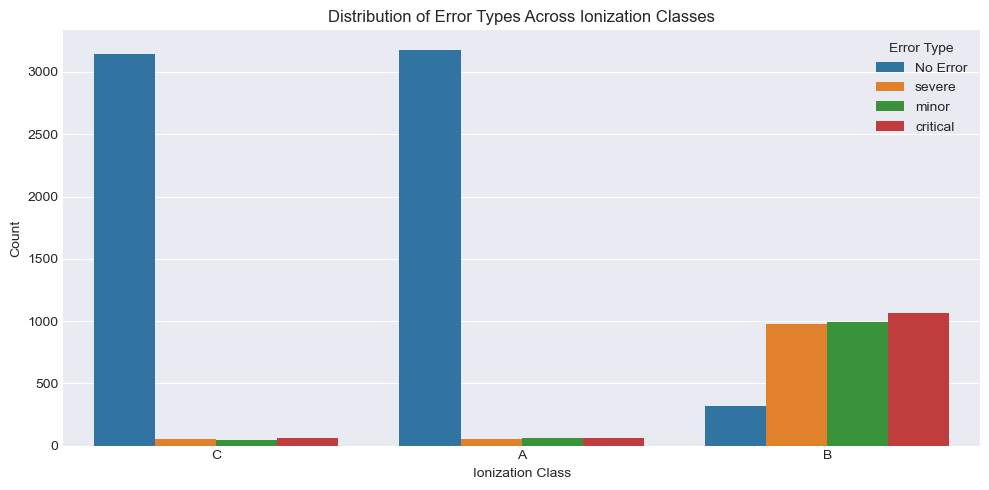

In [55]:

plt.figure(figsize=(10, 5))
sns.countplot(x='ionizationclass', hue='error_type', data=merged_df)
plt.title('Distribution of Error Types Across Ionization Classes')
plt.xlabel('Ionization Class')
plt.ylabel('Count')
plt.legend(title='Error Type')
plt.tight_layout()
plt.show()


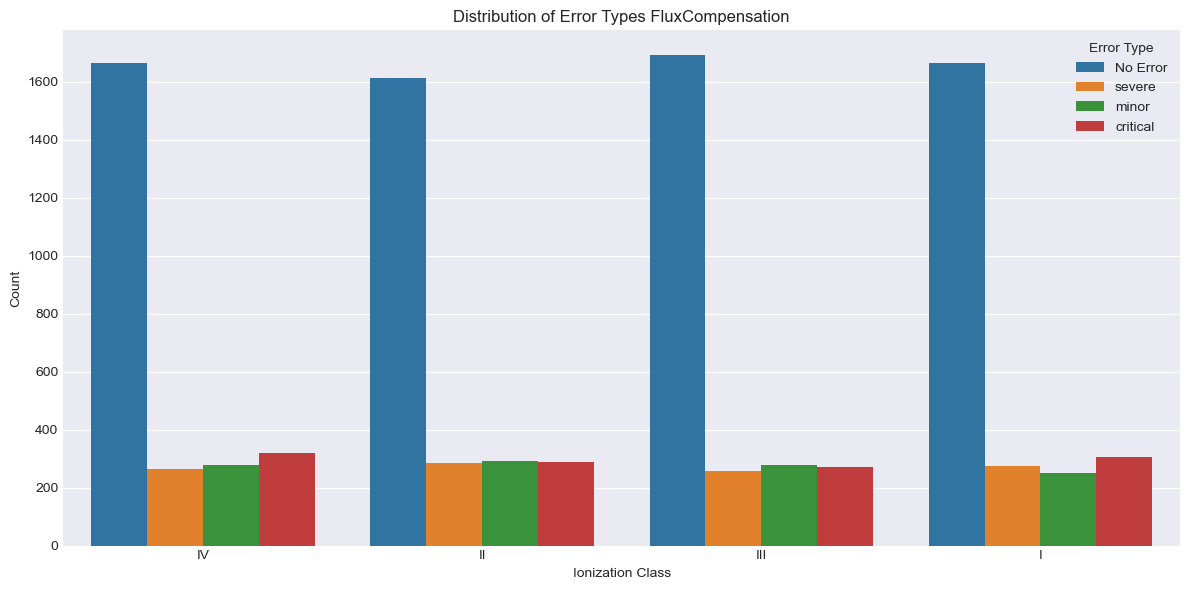

In [56]:
plt.figure(figsize=(12, 6))
sns.countplot(x='FluxCompensation', hue='error_type', data=merged_df)
plt.title('Distribution of Error Types FluxCompensation')
plt.xlabel('Ionization Class')
plt.ylabel('Count')
plt.legend(title='Error Type')
plt.tight_layout()
plt.show()